## Images from camera

In [1]:
import csv
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

folder_name = "data_files"
legend_filename = "_legend.csv"
file_extension = ".h5"

###############################################
# function to use for scaling image contrast
def scale(value, exposure_time_in_ms):
    # these are the min and max values recorded from the camera across all images
    global_min_value = 135790592
    global_max_value = 760741888
    
    # scaling factor per ms: increase this to brighten the images
    scaling_factor_per_ms = 0.1
    
    scale_min = global_min_value
    scale_max_per_ms = scaling_factor_per_ms * (global_max_value - global_min_value)
    return (value - scale_min) / (scale_max_per_ms * exposure_time_in_ms)

###############################################
# read the legend file with the list of files and metadata
with open(f'{folder_name}/{legend_filename}') as f:
    reader = csv.reader(f)
    legend = list(reader)

file_list = [
    { 'name': row[0],
      'exposure_time_in_ms': float(row[1]),
      'with_ion': row[2].upper() == 'Y' } for row in legend[1:]]
print(file_list)

###############################################
# read all the images and store them in all_images
all_images = { 'bright': {}, 'dark': {} }

for file in file_list:    
    f = h5py.File(f"{folder_name}/{file['name']}{file_extension}", 'r')

    ion_state = 'bright' if file['with_ion'] else 'dark'
    exposure_time_in_ms = file['exposure_time_in_ms']

    for datapoint_idx in range(1,10):
        try:
            datapoint = f["images"][f"datapoint{datapoint_idx}"]
        except:
            continue

        for image_idx in range(100):
            image_data = datapoint[str(image_idx)][()]
                  
            # scale image_data to range from 0 to 1
            image_data = [[scale(value, exposure_time_in_ms) for value in row] for row in image_data]
                  
            if not exposure_time_in_ms in all_images[ion_state]:
                all_images[ion_state][exposure_time_in_ms] = []
            all_images[ion_state][exposure_time_in_ms].append(image_data)

[{'name': '1614_14_images', 'exposure_time_in_ms': 1.0, 'with_ion': False}, {'name': '1624_50_images', 'exposure_time_in_ms': 0.5, 'with_ion': False}, {'name': '1629_33_images', 'exposure_time_in_ms': 0.2, 'with_ion': False}, {'name': '1705_25_images', 'exposure_time_in_ms': 0.2, 'with_ion': True}, {'name': '1712_39_images', 'exposure_time_in_ms': 0.5, 'with_ion': True}, {'name': '1714_40_images', 'exposure_time_in_ms': 1.0, 'with_ion': True}, {'name': '1716_40_images', 'exposure_time_in_ms': 2.0, 'with_ion': True}, {'name': '1718_41_images', 'exposure_time_in_ms': 3.0, 'with_ion': True}, {'name': '1721_21_images', 'exposure_time_in_ms': 4.0, 'with_ion': True}, {'name': '1725_22_images', 'exposure_time_in_ms': 6.0, 'with_ion': True}, {'name': '1732_27_images', 'exposure_time_in_ms': 6.0, 'with_ion': False}, {'name': '1734_15_images', 'exposure_time_in_ms': 4.0, 'with_ion': False}, {'name': '1736_03_images', 'exposure_time_in_ms': 2.0, 'with_ion': False}, {'name': '1738_41_images', 'exp

## A couple of sample images

[[ 0.02   0.018  0.02   0.02   0.028  0.028  0.038  0.035  0.024  0.03 ]
 [ 0.031  0.053  0.146  0.025  0.023  0.039  0.026  0.027  0.039  0.09 ]
 [ 0.033  0.045  0.043  0.114  1.023  0.04   0.09   0.763  0.496  0.027]
 [ 0.024  0.025  0.03   0.031  0.035  0.037  0.049  0.112  0.038  0.046]
 [ 0.025  0.029  0.03   0.039  0.073  0.633  1.765  0.275  0.224  0.482]
 [ 0.04   0.055  0.082  0.103  0.081  0.95   0.84   0.206  0.025  0.029]
 [ 0.03   0.028  0.034  0.022  0.033  0.049  0.092  0.387  0.367  0.035]
 [ 0.022  0.034  0.032  0.036  0.044  0.066  0.198  0.041  0.048  0.052]
 [ 0.021  0.02   0.031  0.031  0.029  0.033  0.036  0.031  0.029  0.03 ]
 [ 0.033  0.033  0.038  0.039  0.034  0.053  0.029  0.033  0.033  0.026]
 [ 0.027  0.027  0.029  0.024  0.018  0.028  0.043  0.256  0.05   0.111]]


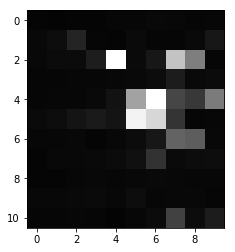

In [2]:
# gets the 14th sample bright image with exposure_time_in_ms=2
sample_bright = all_images['bright'][2][14]
print(np.round(sample_bright,3))
plt.figure()
plt.imshow(sample_bright, cmap=plt.get_cmap('gray'), vmin=0.0, vmax=1.0)

[[ 0.024  0.016  0.02   0.016  0.015  0.021  0.016  0.024  0.013  0.02 ]
 [ 0.027  0.028  0.028  0.036  0.034  0.034  0.029  0.031  0.021  0.033]
 [ 0.018  0.021  0.016  0.024  0.02   0.021  0.023  0.028  0.02   0.019]
 [ 0.017  0.023  0.021  0.023  0.021  0.031  0.034  0.032  0.024  0.018]
 [ 0.022  0.013  0.024  0.021  0.028  0.034  0.029  0.034  0.031  0.027]
 [ 0.014  0.017  0.014  0.02   0.02   0.027  0.028  0.033  0.026  0.027]
 [ 0.03   0.03   0.036  0.029  0.044  0.041  0.041  0.039  0.034  0.034]
 [ 0.023  0.025  0.025  0.022  0.035  0.036  0.03   0.036  0.036  0.034]
 [ 0.027  0.028  0.029  0.025  0.024  0.028  0.024  0.026  0.029  0.024]
 [ 0.034  0.032  0.035  0.049  0.149  0.04   0.031  0.036  0.034  0.028]
 [ 0.444  0.018  0.027  0.027  0.028  0.033  0.037  0.044  0.04   0.045]]


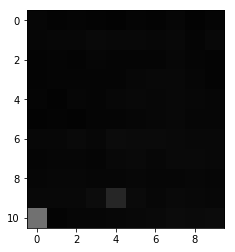

In [3]:
# gets the 14th sample dark image with exposure_time_in_ms=2
sample_dark = all_images['dark'][2][14]
print(np.round(sample_dark,3))
plt.figure()
plt.imshow(sample_dark, cmap=plt.get_cmap('gray'), vmin=0.0, vmax=1.0)

## Mean images for each exposure time

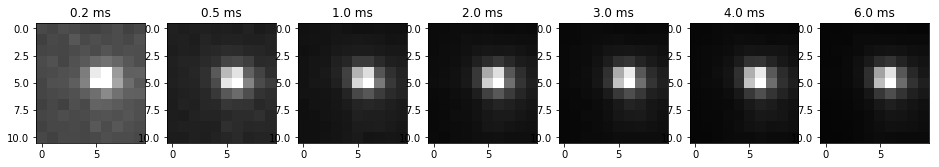

In [4]:
# plot the mean bright image for every exposure time
fig, axes = plt.subplots(nrows=1, ncols=len(all_images['bright']), figsize=(16,4))
for i, exposure_time_in_ms in enumerate(sorted(all_images['bright'])):
    avg_image = np.mean(all_images['bright'][exposure_time_in_ms], 0)
    #print(f'average image for exposure time {exposure_time_in_ms} ms:\n{np.round(avg_image,3)}')
    axes[i].imshow(avg_image, cmap=plt.get_cmap('gray'), vmin=0.0, vmax=1.0)
    axes[i].set_title(f'{exposure_time_in_ms} ms')

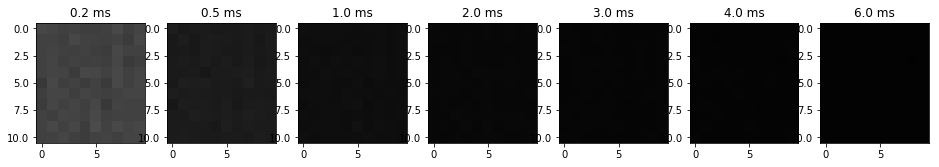

In [5]:
# plot the mean dark image for every exposure time
fig, axes = plt.subplots(nrows=1, ncols=len(all_images['dark']), figsize=(16,4))
for i, exposure_time_in_ms in enumerate(sorted(all_images['dark'])):
    avg_image = np.mean(all_images['dark'][exposure_time_in_ms], 0)
    #print(f'average image for exposure time {exposure_time_in_ms} ms:\n{np.round(avg_image,3)}')
    axes[i].imshow(avg_image, cmap=plt.get_cmap('gray'), vmin=0.0, vmax=1.0)
    axes[i].set_title(f'{exposure_time_in_ms} ms')